# Perform benchmarking on `operation` mapping from the paper vs Medcat

## Read and format source files

### Read the concepts

In [2]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
athenaSnomedDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
athenaSnomedDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


### Read the mapping file from the published paper which is used for benchmarking

In [3]:
import pandas as pd

sourceDf = pd.read_csv('data/20004_operation.csv', dtype=str)
sourceDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,0,4178367,VALUE,NaN,NaN,1603436039043
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,0,4261794,VALUE,NaN,NaN,1603436039045
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,0,4171687,VALUE,NaN,NaN,1603436039047
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,0,4194197,VALUE,NaN,NaN,1603436039049
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,0,4120443,VALUE,NaN,NaN,1603436039051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,0,4266668,VALUE,NaN,NaN,1603436039260
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,0,4159766,VALUE,NaN,NaN,1603436039260
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,0,4219032,VALUE,NaN,NaN,1603436039261
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,0,4141940,VALUE,NaN,NaN,1603436039262


### Read mapping file from Usagi

In [4]:
import pandas as pd

usagiDf = pd.read_csv('data/20004_operation_output.csv', dtype=str)
usagiDf

,sourceCode,sourceName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,targetConceptId,targetConceptName,targetVocabularyId,targetDomainId,targetStandardConcept,targetChildCount,targetParentCount,targetConceptClassId,targetConceptCode,targetValidStartDate,targetValidEndDate,targetInvalidReason
0,1587,removal of epididymal cyst,-1,NaN,0.7909334897994995,UNCHECKED,4072177,Aspiration of epididymal cyst,SNOMED,Procedure,S,1,1,Procedure,176474000,20020131,20991231,NaN
1,1539,uterine polypectomy/uterine polyps removed,-1,NaN,0.4652840793132782,UNCHECKED,4130184,Excision of uterine polyp,SNOMED,Procedure,S,3,3,Procedure,236884004,20020131,20991231,NaN
2,1219,other urological surgery,-1,NaN,0.48205864429473877,UNCHECKED,4203094,Neurological therapy,SNOMED,Procedure,S,1,1,Procedure,309516002,20020131,20991231,NaN
3,1097,heart valve surgery,-1,NaN,0.7274869084358215,UNCHECKED,4002032,Heart valve closure,SNOMED,Procedure,S,6,2,Procedure,119768002,20020131,20991231,NaN
4,1354,gynaecological surgery,-1,NaN,0.7508458495140076,UNCHECKED,4129747,Operation on female genital organs,SNOMED,Procedure,S,24,2,Procedure,12658000,20020131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1451,biliary surgery,-1,NaN,0.5715658664703369,UNCHECKED,4174389,Operation on biliary tract,SNOMED,Procedure,S,20,3,Procedure,42560003,20020131,20991231,NaN
250,1110,renal artery angioplasty +/- stent,-1,NaN,0.49565476179122925,UNCHECKED,4225291,Angioplasty of renal artery,SNOMED,Procedure,S,75,4,Procedure,346007006,20020131,20991231,NaN
251,1102,fem-pop bypass/leg artery bypass,-1,NaN,0.48303571343421936,UNCHECKED,4226952,Femoral artery bypass,SNOMED,Procedure,S,122,2,Procedure,405463009,20040131,20991231,NaN
252,1494,foot surgery,-1,NaN,0.5656071305274963,UNCHECKED,4261829,Laser surgery,SNOMED,Procedure,S,80,2,Procedure,35631009,20020131,20991231,NaN


### Read the mapping file from Medcat

In [5]:
import pandas as pd

medcatDf = pd.read_csv('data/mapped_20004_operation_medcat.csv', dtype=str)
medcatDf

,source_concept_id,source_concept_name,matching_concept_entity,matching_concept_score
0,1603,scan / x-ray,{},0.0
1,1599,exercise ecg,{},0.0
2,1450,liver surgery,{},0.0
3,1537,lymph node surgery,{},0.0
4,1615,bone marrow biopsy,"{0: {'pretty_name': 'Biopsy', 'cui': '4311405'...",1.0
...,...,...,...,...
249,1457,pancreatic transplant,{},0.0
250,1442,amputation of toe,"{1: {'pretty_name': 'Amputation Of Toe', 'cui'...",1.0
251,1440,amputation of leg,"{0: {'pretty_name': 'Amputation', 'cui': '4217...",1.0
252,1360,endometrial ablation,"{0: {'pretty_name': 'Endometrial Ablation', 'c...",1.0


In [6]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in medcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept_entity"])
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = entity['context_similarity']
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

medcatDf['concept ID'] = cuis
medcatDf['Concept Type'] = conceptTypes
medcatDf['Concept Pretty Names'] = conceptPrettyNames
medcatDf['Concept Source Values'] = conceptSourceValues
medcatDf['Context Similarity Score'] = contextSimilarityScores
medcatDf

,source_concept_id,source_concept_name,matching_concept_entity,matching_concept_score,concept ID,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,1603,scan / x-ray,{},0.0,None,None,None,None,0.0
1,1599,exercise ecg,{},0.0,None,None,None,None,0.0
2,1450,liver surgery,{},0.0,None,None,None,None,0.0
3,1537,lymph node surgery,{},0.0,None,None,None,None,0.0
4,1615,bone marrow biopsy,"{0: {'pretty_name': 'Biopsy', 'cui': '4311405'...",1.0,4311405,[],Biopsy,biopsy,1.0
...,...,...,...,...,...,...,...,...,...
249,1457,pancreatic transplant,{},0.0,None,None,None,None,0.0
250,1442,amputation of toe,"{1: {'pretty_name': 'Amputation Of Toe', 'cui'...",1.0,4159766,[],Amputation Of Toe,amputation of toe,1.0
251,1440,amputation of leg,"{0: {'pretty_name': 'Amputation', 'cui': '4217...",1.0,4217482,[],Amputation,amputation,1.0
252,1360,endometrial ablation,"{0: {'pretty_name': 'Endometrial Ablation', 'c...",1.0,4141940,[],Endometrial Ablation,endometrial ablation,1.0


### Read the mapping file from Fuzzy

In [7]:
import pandas as pd

fuzzyDf = pd.read_csv('data/mapped_20004_operation_fuzzy.csv', dtype=str)
fuzzyDf

,source_concept_id,source_concept_name,matching_concept_name,matching_concept_id,matching_concept_score
0,1603,scan / x-ray,US brain scan,4061132,70
1,1599,exercise ecg,Exercise challenge,4029347,73
2,1450,liver surgery,Laser surgery,4261829,85
3,1537,lymph node surgery,Procedure on lymph node,4043202,68
4,1615,bone marrow biopsy,Biopsy of bone,4029787,81
...,...,...,...,...,...
249,1457,pancreatic transplant,Part organ pancreatic transplant,4079549,79
250,1442,amputation of toe,Amputation of toe,4159766,100
251,1440,amputation of leg,Amputation of ankle,4264289,89
252,1360,endometrial ablation,Endometrial ablation,4141940,100


/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matching_concept_score', ylabel='Density'>

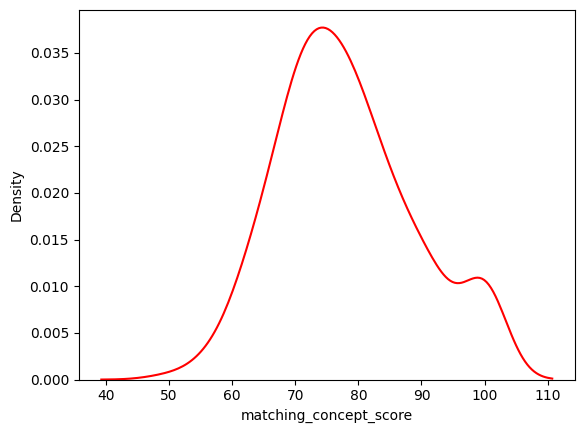

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(fuzzyDf.matching_concept_score, hist=False, color='red', ax=ax)

### Perform mapping using Transformers 

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('pritamdeka/S-BioBert-snli-multinli-stsb')
embeddings = []
for i, row in athenaSnomedDf.iterrows():
    embeddings.append(model.encode(row.concept_name))
athenaSnomedDf['embedding'] = embeddings

/tmp/ipykernel_2281072/1158838149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athenaSnomedDf['embedding'] = embeddings


In [32]:
from tqdm import tqdm
from sentence_transformers import util


transformerDf = sourceDf.loc[:, ['sourceValueCode', 'sourceName']]
for i, row in tqdm(transformerDf.iterrows()):
    embedding = model.encode(str(row.sourceName))
    athenaSnomedDf['similarity_score'] = athenaSnomedDf.embedding.apply(lambda x: util.pytorch_cos_sim(embedding, x))
    matchingConceptDf = athenaSnomedDf.sort_values(by=['similarity_score']).tail(1)
    transformerDf.loc[i, 'matching_concept_id'] = matchingConceptDf.concept_id.item()
    transformerDf.loc[i, 'matching_concept_name'] = matchingConceptDf.concept_name.item()
    transformerDf.loc[i, 'matching_concept_score'] = matchingConceptDf.similarity_score.item().item()

0it [00:00, ?it/s]/tmp/ipykernel_2281072/808396110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athenaSnomedDf['similarity_score'] = athenaSnomedDf.embedding.apply(lambda x: util.pytorch_cos_sim(embedding, x))
254it [1:24:14, 19.90s/it]


In [33]:
transformerDf.to_csv('data/mapped_20004_operation_transformer.csv', index=False)

In [35]:
transformerDf

,sourceValueCode,sourceName,matching_concept_id,matching_concept_name,matching_concept_score
0,1603,scan / x-ray,4031225,Abnormal radionuclide scan,0.589968
1,1599,exercise ecg,4029810,Exercise state,0.729360
2,1450,liver surgery,37017028,Injury to liver during surgery,0.723927
3,1537,lymph node surgery,4200028,Finding of size of lymph node,0.756988
4,1615,bone marrow biopsy,4097745,Bone marrow finding,0.838371
...,...,...,...,...,...
249,1457,pancreatic transplant,4333225,Rejection of pancreas transplant,0.826130
250,1442,amputation of toe,4319152,Traumatic amputation of toe,0.931884
251,1440,amputation of leg,42536847,Traumatic amputation of lower leg,0.865921
252,1360,endometrial ablation,46273430,Lesion of endometrium,0.678052


In [ ]:
import pandas as pd

transformerDf = pd.read_csv('data/mapped_20004_operation_transformer.csv', dtype=str)

### Merge all the files

In [36]:
mergedDf = sourceDf\
    .merge(usagiDf.add_suffix('_usagi'), left_on=['sourceValueCode', 'sourceName'], right_on=['sourceCode_usagi', 'sourceName_usagi'])\
        .merge(medcatDf.add_suffix('_medcat'), left_on=['sourceValueCode', 'sourceName'], right_on=['source_concept_id_medcat', 'source_concept_name_medcat'])\
            .merge(fuzzyDf.add_suffix('_fuzzy'), left_on=['sourceValueCode', 'sourceName'], right_on=['source_concept_id_fuzzy', 'source_concept_name_fuzzy'])\
                .merge(transformerDf.add_suffix('_transformer'), left_on=['sourceValueCode', 'sourceName'], right_on=['sourceValueCode_transformer', 'sourceName_transformer'])
mergedDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,...,source_concept_id_fuzzy,source_concept_name_fuzzy,matching_concept_name_fuzzy,matching_concept_id_fuzzy,matching_concept_score_fuzzy,sourceValueCode_transformer,sourceName_transformer,matching_concept_id_transformer,matching_concept_name_transformer,matching_concept_score_transformer
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,...,1603,scan / x-ray,US brain scan,4061132,70,1603,scan / x-ray,4031225,Abnormal radionuclide scan,0.589968
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,...,1599,exercise ecg,Exercise challenge,4029347,73,1599,exercise ecg,4029810,Exercise state,0.729360
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,...,1450,liver surgery,Laser surgery,4261829,85,1450,liver surgery,37017028,Injury to liver during surgery,0.723927
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,...,1537,lymph node surgery,Procedure on lymph node,4043202,68,1537,lymph node surgery,4200028,Finding of size of lymph node,0.756988
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,...,1615,bone marrow biopsy,Biopsy of bone,4029787,81,1615,bone marrow biopsy,4097745,Bone marrow finding,0.838371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,...,1457,pancreatic transplant,Part organ pancreatic transplant,4079549,79,1457,pancreatic transplant,4333225,Rejection of pancreas transplant,0.826130
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,...,1442,amputation of toe,Amputation of toe,4159766,100,1442,amputation of toe,4319152,Traumatic amputation of toe,0.931884
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,...,1440,amputation of leg,Amputation of ankle,4264289,89,1440,amputation of leg,42536847,Traumatic amputation of lower leg,0.865921
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,...,1360,endometrial ablation,Endometrial ablation,4141940,100,1360,endometrial ablation,46273430,Lesion of endometrium,0.678052


## Data Exploration (EDA)

### Total number of concepts to be mapped

In [37]:
mergedDf.shape[0]

254

### Mapping Status Counts

In [38]:
sourceDf.mappingStatus.value_counts()

APPROVED     128
UNCHECKED    124
FLAGGED        1
IGNORED        1
Name: mappingStatus, dtype: int64

### Number of concept id that are common between the published work and the Usagi

In [39]:
mergedDf[mergedDf['conceptId'] == mergedDf['targetConceptId_usagi']].shape[0]

180

### Number of concept id that are common between the published work and the Medcat

In [40]:
mergedDf[mergedDf['conceptId'] == mergedDf['concept ID_medcat']].shape[0]

49

### Number of concept id that are common between the Usagi and the Medcat

In [41]:
mergedDf[mergedDf['targetConceptId_usagi'] == mergedDf['concept ID_medcat']].shape[0]

48

### Number of concept id that are common between the published work, the Medcat, and the Usagi

In [42]:
mergedDf[(mergedDf['conceptId'] == mergedDf['targetConceptId_usagi']) & (mergedDf['conceptId'] == mergedDf['concept ID_medcat'])].shape[0]

46

### Number of source concepts that are not mapped to any standard in Medcat

In [43]:
medcatDf['concept ID'].isna().sum()

153

### Venn diagram

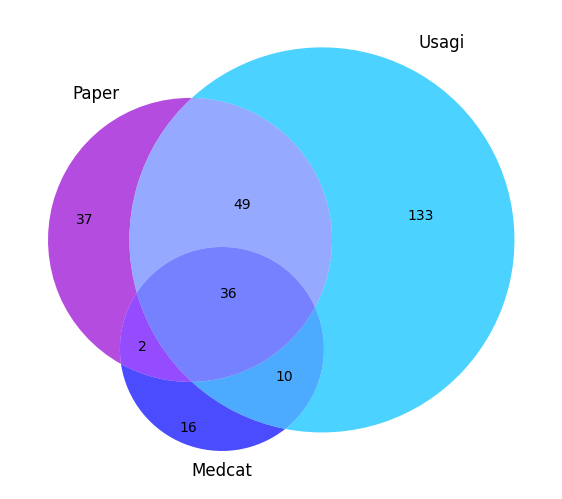

In [44]:
A = set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['concept ID_medcat'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Paper', 'Usagi', 'Medcat')  
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

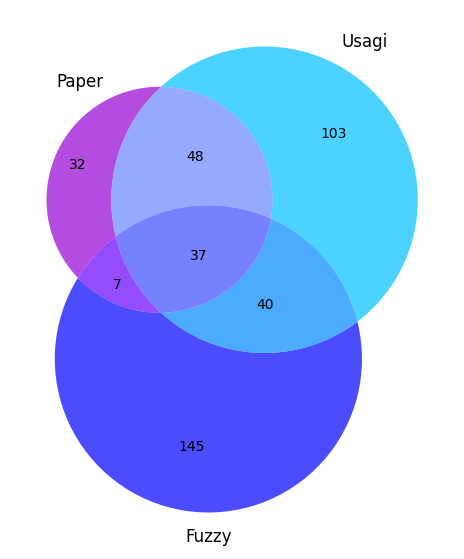

In [45]:
A = set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_fuzzy'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Paper', 'Usagi', 'Fuzzy')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

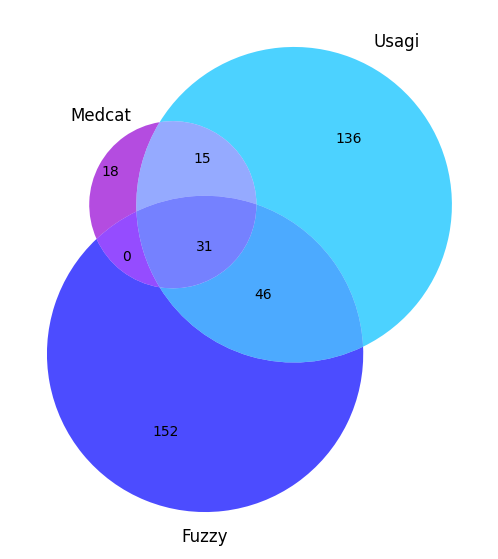

In [46]:
A = set(mergedDf['concept ID_medcat'])
B = set(mergedDf['targetConceptId_usagi'])
C = set(mergedDf['matching_concept_id_fuzzy'])

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Medcat', 'Usagi', 'Fuzzy')
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)    
plt.show()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

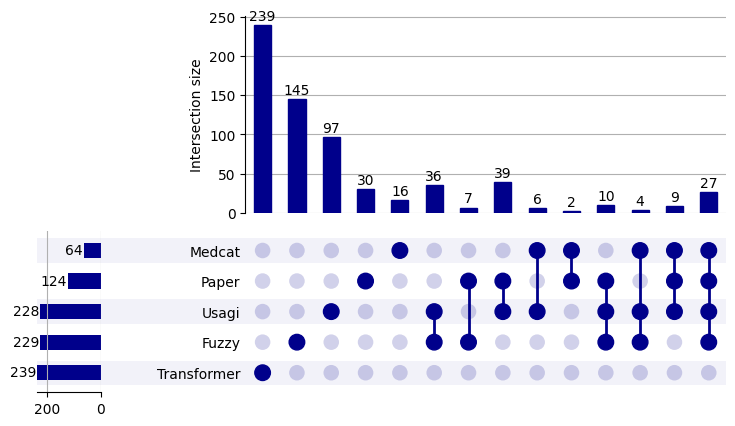

In [48]:
from upsetplot import from_contents, UpSet


upsetPlotData = from_contents({
    'Paper': set(mergedDf[mergedDf.mappingStatus == 'APPROVED']['conceptId']),
    'Fuzzy': set(mergedDf['matching_concept_id_fuzzy']),
    'Usagi': set(mergedDf['targetConceptId_usagi']),
    'Medcat': set(mergedDf['concept ID_medcat']),
    'Transformer': set(mergedDf['matching_concept_id_transformer'])
    })

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()